In [1]:
import pymrio  
import os  
import matplotlib.pyplot as plt  
import numpy as np  
import seaborn as sns  
import plotly.graph_objects as go 

/Users/meganzhang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


ModuleNotFoundError: No module named 'plotly'

In [3]:
eora_path = 'C:/Users/megan/mz_codes/Eora26_2022_bp'  
eora26 = pymrio.parse_eora26(eora_path, year=2022)  
  
# Replace zeros with mean value  
x_array = np.array(eora26.x)  
if np.any(x_array == 0):  
   mean_value = np.nanmean(x_array[x_array != 0])  
   x_array[x_array == 0] = mean_value  
   eora26.x = x_array  
  
eora26.calc_all()  
eora26.calc_extensions()

C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1962: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=0, inplace=True)
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True

In [4]:
if eora26.A is None:  
   print("The input-output table is not available.")  
else:  
   regions = eora26.A.index.get_level_values(0).unique()  
   sectors = eora26.A.index.get_level_values(1).unique()  
   io_table = eora26.A  
   fd_table = eora26.Y  
   leontief_inverse = eora26.L  
   print("Done at this step.") 

Done at this step.


C:\Users\megan\AppData\Local\Temp\ipykernel_12428\2915169899.py:7: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(io_table_values), vmin=np.log10(np.min(io_table)), vmax=np.log10(vmax), cmap='viridis')


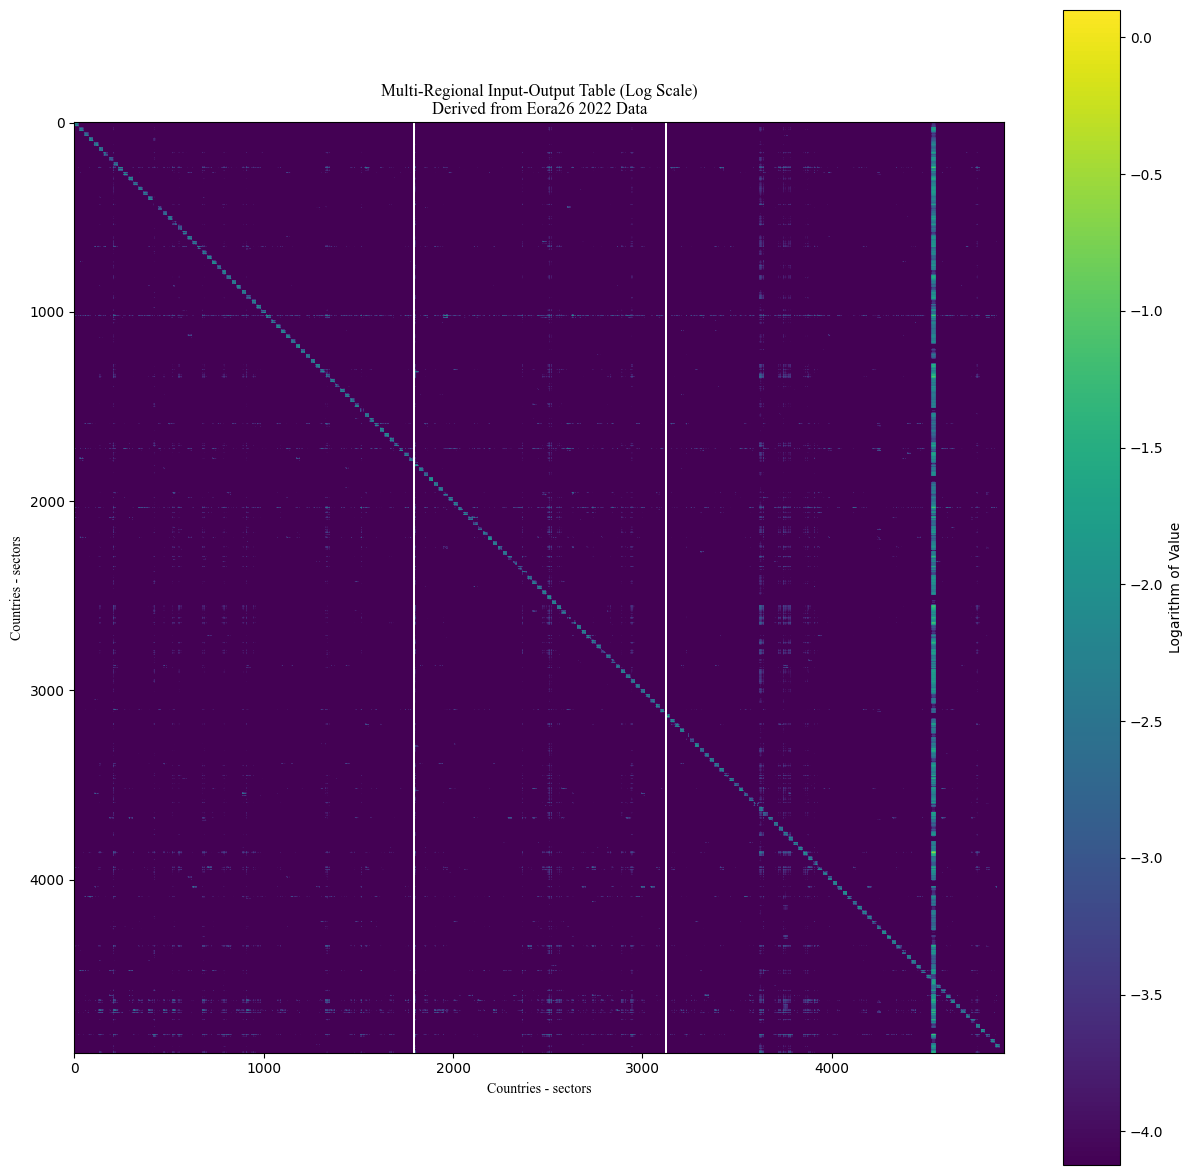

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(15, 15))  
io_table_values = io_table.values
vmax = np.percentile(io_table_values[~np.isnan(io_table_values)], 95)  # Reduce outliers' impact
vmin = np.min(io_table_values[~np.isnan(io_table_values)]) 
  
io_table_values[io_table_values == 0] = 1e-10  
plt.imshow(np.log10(io_table_values), vmin=np.log10(np.min(io_table)), vmax=np.log10(vmax), cmap='viridis')  
plt.xlabel("Countries - sectors", fontname = 'Times New Roman')  
plt.ylabel("Countries - sectors", fontname='Times New Roman')  
plt.title("Multi-Regional Input-Output Table (Log Scale)\nDerived from Eora26 2022 Data", fontname='Times New Roman')  
plt.colorbar(label='Logarithm of Value') 
plt.show()
plt.savefig("iotable_heatmap.png", bbox_inches='tight')  

In [8]:
broadband_sectors = ['Post and Telecommunications', 'Electrical and Machinery', 'Construction', 'Transport', 'Finacial Intermediation and Business Activities']  
   
broadband_io_table = io_table.loc[(slice(None), broadband_sectors), (slice(None), sectors)]  
broadband_output = broadband_io_table.sum(axis=1)  
  
fig = go.Figure(data=[go.Sankey(  
   node = dict(  
    pad = 15,  
    thickness = 20,  
    line = dict(color = "black", width = 0.5),  
    label = sectors,  
    color = "blue"  
   ),  
   link = dict(  
    source = broadband_io_table.columns.get_level_values(1).codes, 
    target = broadband_io_table.index.get_level_values(1).codes,  
    value = broadband_io_table.values.flatten()  
  ))])  
  
fig.update_layout(title_text="Monetary Flows from Broadband Sectors", font_size=16)  
fig.show()  
  


NameError: name 'eora26' is not defined

In [ ]:
co2_extension = eora26.extensions['CO2']  #check eora26 and pymrio for stored emissions/satellite data
broadband_co2_emissions = co2_extension.loc[(slice(None), broadband_sectors)]  
  
fig = go.Figure(data=[go.Sankey(  
   node = dict(  
    pad = 15,  
    thickness = 20,  
    line = dict(color = "black", width = 0.5),  
    label = sectors,  
    color = "blue"  
   ),  
   link = dict(  
    source = broadband_co2_emissions.columns.get_level_values(1).codes, 
    target = broadband_co2_emissions.index.get_level_values(1).codes,  
    value = broadband_co2_emissions.values.flatten()  
  ))])  
  
fig.update_layout(title_text="CO2 Emissions from Broadband Sectors",font_size=16)
fig.show()


In [ ]:
np.savetxt('io_table.csv', io_table, delimiter=',')  
np.savetxt('fd_table.csv', fd_table, delimiter=',')  
np.savetxt('leontief_inverse.csv', leontief_inverse, delimiter=',')  
#np.savetxt('carbon_footprint_df.csv', carbon_footprint_df, delimiter=',')